In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.inf)
import dgl
import torch
from torch._C import device
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from dgl.data import MiniGCDataset
import dgl.nn.pytorch as DGL_torch
from dgl.nn.pytorch import GraphConv
from sklearn.metrics import accuracy_score
import networkx as nx
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import torch_geometric.nn as pyg_nn

In [ ]:
def MainDate(root, path):
    Original = []
    Target = []
    Label = root[-1]
    Nodes = []
    Edges_Nums = 0
    Edges_Weight = []
    
    # 读取文件并分割每一行，然后转换成浮点数
    adjacency_matrix = np.loadtxt(path, delimiter=' ')

    AM_copy = np.array(adjacency_matrix).copy()
    
    # # 打印读取的邻接矩阵
    # print("AdjacencyMatrix.shape:\n", adjacency_matrix.shape, '\n') 
    # print("AdjacencyMatrix:\n", adjacency_matrix, '\n') 
    
    for i in range(AM_copy.shape[0]):
        if i == 0:
            if  AM_copy[i][i + 1] == 0:
                AM_copy[i][i + 1] = AM_copy[i][i]
                AM_copy[i + 1][i] = AM_copy[i][i]
              
        if i > 0 and i < AM_copy.shape[0] - 1:
            if AM_copy[i + 1][i] == 0 and AM_copy[i][i + 1] == 0:
                AM_copy[i][i + 1] = AM_copy[i][i]
                AM_copy[i + 1][i] = AM_copy[i][i]
        
        if i == AM_copy.shape[0] - 1:
            if  AM_copy[i][i - 1] == 0:
                AM_copy[i][i - 1] = AM_copy[i][i]
                AM_copy[i - 1][i] = AM_copy[i][i]
                
    for i in range(AM_copy.shape[0]):
        Nodes.append(i)            
        for j in range(AM_copy.shape[1]):    
            if AM_copy[i][j] != 0:# and i != j:
                Edges_Nums += 1
                Edges_Weight.append(AM_copy[i][j])
                Original.append(i)
                Target.append(j)
    
    return torch.tensor(Original), torch.tensor(Target), torch.tensor(int(Label)), torch.tensor(Nodes), Edges_Nums, torch.tensor(Edges_Weight)

In [ ]:
def GraphCreat(path, Original, Target, Label ,Edges_Nums, Edges_Weight):
    # 使用dgl.graph创建图，传入边的列表
    graph = dgl.graph((Original, Target))

    # 为节点特征赋值
    # 读取文件并分割每一行，然后转换成浮点数
    Nodes_Features = np.loadtxt(path, delimiter=' ')
    
    # print("Nodes_Features.shape:\n", Nodes_Features.shape, '\n')
    # print("Nodes_Features:\n", Nodes_Features, '\n')
                    
    graph.ndata['feat'] = torch.tensor(Nodes_Features)

    # 为边特征赋值
    graph.edata['feat'] = (Edges_Weight).reshape((Edges_Nums, 1))

    # 打印图信息
    # print((graph, Label))
    return (graph, Label)

In [ ]:
import os

# 指定根路径
root_path = r'path_to_your_project'
# 指定要遍历的顶层子文件夹名称
top_subfolders = ['AdjacencyMatrix_3', 'OneHotEncodedData']
AdjacencyMatrix_FilePath = []
OneHotEncodedData_FilePath = []


# 遍历顶层子文件夹
for idx, top_folder in enumerate(top_subfolders):
    # 构造顶层子文件夹的路径
    top_path = os.path.join(root_path, top_folder)
    for root, dirs, files in os.walk(top_path):
        # print(root, dirs, files)
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                # print(root, "file_path:", file_path)
                if idx == 0:
                    AdjacencyMatrix_FilePath.append((root.split('\\')[-1], file_path))
                elif idx == 1:
                    OneHotEncodedData_FilePath.append((root.split('\\')[-1], file_path))

In [ ]:
# 测试
Original, Target, Label, Nodes, Edges_Nums, Edges_Weight = MainDate(AdjacencyMatrix_FilePath[0][0], AdjacencyMatrix_FilePath[0][1])

GraphCreat(OneHotEncodedData_FilePath[0][1], Original, Target, Label ,Edges_Nums, Edges_Weight)

(Graph(num_nodes=58, num_edges=342,
       ndata_schemes={'feat': Scheme(shape=(25,), dtype=torch.float64)}
       edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float64)}),
 tensor(0))

In [ ]:
# # 测试
# Original, Target, Label, Nodes, Edges_Nums, Edges_Weight = MainDate(AdjacencyMatrix_FilePath[0][0], r"C:\Users\ChenXY\Desktop\VScode\Python\iGEM\Final_First\AllData\AdjacencyMatrix\label0\1156_AdjacencyMatrix.txt")
# # print(Original)
# # print(Target)
# # print(Label)
# # print(Edges_Nums)
# # print(Edges_Weight)
# GraphCreat(r"path_to_your_project", Original, Target, Label ,Edges_Nums, Edges_Weight)

In [ ]:
print(len(AdjacencyMatrix_FilePath), len(OneHotEncodedData_FilePath))

7386 7386


In [ ]:
Dataset = []
for i in range(len(AdjacencyMatrix_FilePath)):
    if AdjacencyMatrix_FilePath[i][1].split('\\')[-2] == 'label0' and AdjacencyMatrix_FilePath[i][1].split('\\')[-1] == '1156_AdjacencyMatrix.txt':
        continue
    if AdjacencyMatrix_FilePath[i][1].split('\\')[-2] == 'label0' and AdjacencyMatrix_FilePath[i][1].split('\\')[-1] == '2271_AdjacencyMatrix.txt':
        continue
    if AdjacencyMatrix_FilePath[i][1].split('\\')[-2] == 'label1' and AdjacencyMatrix_FilePath[i][1].split('\\')[-1] == '513_AdjacencyMatrix.txt':
        continue
    if AdjacencyMatrix_FilePath[i][1].split('\\')[-2] == 'label1' and AdjacencyMatrix_FilePath[i][1].split('\\')[-1] == '616_AdjacencyMatrix.txt':
        continue
    # print(AdjacencyMatrix_FilePath[i][1])
    # print(OneHotEncodedData_FilePath[i][1])
    Original, Target, Label, Nodes, Edges_Nums, Edges_Weight = MainDate(AdjacencyMatrix_FilePath[i][0], AdjacencyMatrix_FilePath[i][1])
    (graph, Label) = GraphCreat(OneHotEncodedData_FilePath[i][1], Original, Target, Label ,Edges_Nums, Edges_Weight)
    Dataset.append((graph, Label))
    

In [ ]:
from dgl.data import DGLDataset

class CustomGraphDataset(DGLDataset):
    def __init__(self, name, tuple_list):
        super(CustomGraphDataset, self).__init__(name=name)
        # 存储元组列表
        self.tuple_list = tuple_list
        self.graphs, self.labels = zip(*tuple_list)  # 立即处理元组列表

    def __getitem__(self, idx):
        # 根据索引获取图和标签
        graph, label = self.graphs[idx], self.labels[idx]
        return graph, label

    def __len__(self):
        # 返回数据集中图的数量
        return len(self.graphs)
    
# 创建数据集实例
# Dataset 是之前定义的包含图和标签对的元组列表
Dataset_DGL = Dataset

print("Type:\n", type(Dataset_DGL), '\n')
# 打印数据集信息
print('Number of samples in the dataset:\n', len(Dataset), '\n')

Type:
 <class 'list'> 

Number of samples in the dataset:
 7382 



In [ ]:
# 示例
idx_Example = 555
graph, label = Dataset_DGL[idx_Example]

# 打印图和标签信息
print("Graph:", graph)
print("Label:", label)

Graph: Graph(num_nodes=67, num_edges=429,
      ndata_schemes={'feat': Scheme(shape=(25,), dtype=torch.float64)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float64)})
Label: tensor(0)


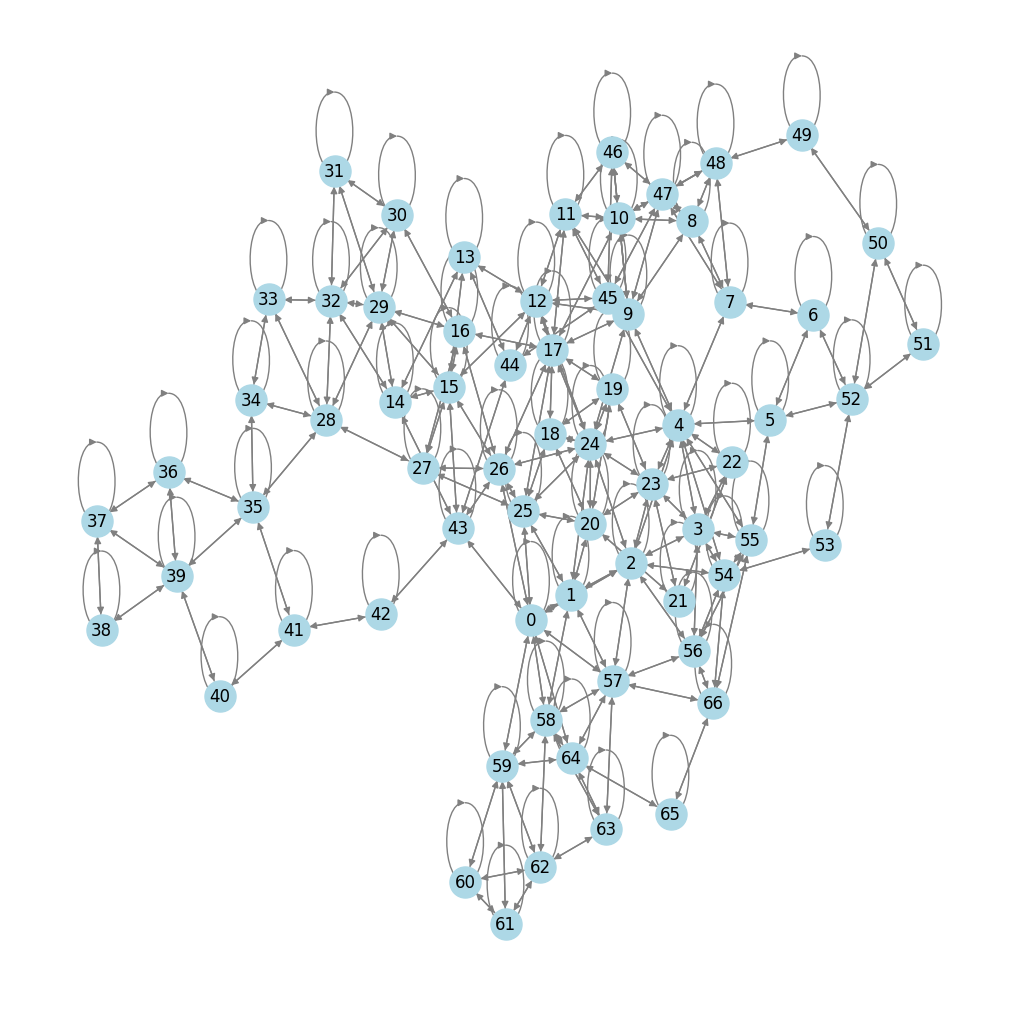

In [ ]:
GraphExample, LabelExample = Dataset[idx_Example]

plt.figure(figsize = (10, 10))

nx_graph = GraphExample.to_networkx()

# 为 NetworkX 图设置节点位置
pos = nx.kamada_kawai_layout(nx_graph)
# pos = nx.spring_layout(nx_graph)
# pos = nx.circular_layout(nx_graph)
# pos = nx.shell_layout(nx_graph)
# pos = nx.random_layout(nx_graph)
# pos = nx.spectral_layout(nx_graph)
# pos = nx.planar_layout(nx_graph)

# 绘制图形
nx.draw(nx_graph, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')

# 显示图形
plt.show()

In [ ]:
# 初始化一个字典来存储每个类别的图列表
class_graphs = {}

# 遍历数据集中所有的图和标签
for graph, label in Dataset_DGL:
    if f'Class_{str(int(label))}' not in class_graphs:
        class_graphs[f'Class_{str(int(label))}'] = []
        class_graphs[f'Class_{str(int(label))}'].append((graph, label))
    elif f'Class_{str(int(label))}' in class_graphs:
        class_graphs[f'Class_{str(int(label))}'].append((graph, label))
      
print("Class_0 Numbers:\n", len(class_graphs['Class_0']))
print("Class_1 Numbers:\n", len(class_graphs['Class_1']))
print("Class_2 Numbers:\n", len(class_graphs['Class_2']))
    


Class_0 Numbers:
 4649
Class_1 Numbers:
 889
Class_2 Numbers:
 1844


In [ ]:
import random

# 设置并使用不同的随机种子进行采样和重采样
random.seed(0)  
sampled_Class0 = random.sample(class_graphs['Class_0'], 2649)

random.seed(122)  
resampled_Class1 = [random.choice(class_graphs['Class_1']) for _ in range(1500)]

random.seed(42)  
sampled_Class2 = random.sample(class_graphs['Class_2'], 1844)

# 合并采样和重采样的结果
sampled_graphs = sampled_Class0 + resampled_Class1 + sampled_Class2

print(len(sampled_graphs))

5993


### GCN

In [ ]:
import random
from sklearn.model_selection import train_test_split

# 首先，随机打乱列表
random.shuffle(sampled_graphs)

# 分割数据为训练集和测试集
Trainset, Testset = train_test_split(sampled_graphs, test_size=0.3, shuffle=True, random_state=42)

# 打印训练集和测试集的大小
print("Training set size:", len(Trainset))
print("Test set size:", len(Testset))

Training set size: 4195
Test set size: 1798


In [ ]:
class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes, num_heads=2):
        super(Classifier, self).__init__()
        self.in_dim = in_dim
        self.hidden_dim = hidden_dim  # 明确定义 hidden_dim 属性
        self.num_heads = num_heads  # 明确定义 num_heads 属性
        
        self.conv1 = DGL_torch.GATConv(in_dim, hidden_dim, num_heads=num_heads)
        self.conv2 = DGL_torch.GATConv(hidden_dim*num_heads, hidden_dim, num_heads=num_heads)
        self.fc1 = nn.Linear(hidden_dim * num_heads, hidden_dim // 2)
        self.classify = nn.Linear(hidden_dim // 2, n_classes)

    def forward(self, g):
        h = g.ndata['feat'].float()
        # 第一层图注意力卷积
        h = self.conv1(g, h)
        # 应用 ReLU 激活函数，并展平除了 attention head 之外的所有维度
        h = F.relu(h.view(h.shape[0], -1))
        # print(h.shape)
        
        # 第二层图注意力卷积
        h = self.conv2(g, h)
        # print(h.shape)
        # 应用 ReLU 激活函数，并展平除了 attention head 之外的所有维度
        h = F.relu(h.view(h.shape[0], -1))
        # print(h.shape)
        
        g.ndata['h'] = h 
        hg = dgl.mean_nodes(g, 'h')
        
        x = F.relu(self.fc1(hg))
        return self.classify(x)

def collate(samples):
    # 输入参数samples是一个列表
    # 列表里的每个元素是图和标签对，如[(graph1, label1), (graph2, label2), ...]
    # zip(*samples)是解压操作，解压为[(graph1, graph2, ...), (label1, label2, ...)]
    graphs, labels = map(list, zip(*samples))
    # dgl.batch 将一批图看作是具有许多互不连接的组件构成的大型图
    return dgl.batch(graphs), torch.tensor(labels, dtype=torch.long)

In [ ]:
# 用pytorch的DataLoader和之前定义的collect函数
data_loader = DataLoader(Trainset, batch_size=64, shuffle=True, collate_fn=collate)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 将 Trainset 中的标签转换为张量
labels = [label for graph, label in Trainset]
label_tensor = torch.tensor(labels).to(DEVICE)
# 确定类别数为标签最大值加一
num_classes = label_tensor.max() + 1

# 构造模型 
model = Classifier(25, 256, num_classes)
model.to(DEVICE)
print(model)

# 定义分类交叉熵损失
loss_func = nn.CrossEntropyLoss()
# 定义Adam优化器
optimizer = optim.Adam(model.parameters(), lr=0.01)
# 学习率调度器
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

Classifier(
  (conv1): GATConv(
    (fc): Linear(in_features=25, out_features=768, bias=False)
    (feat_drop): Dropout(p=0.0, inplace=False)
    (attn_drop): Dropout(p=0.0, inplace=False)
    (leaky_relu): LeakyReLU(negative_slope=0.2)
  )
  (conv2): GATConv(
    (fc): Linear(in_features=768, out_features=768, bias=False)
    (feat_drop): Dropout(p=0.0, inplace=False)
    (attn_drop): Dropout(p=0.0, inplace=False)
    (leaky_relu): LeakyReLU(negative_slope=0.2)
  )
  (fc1): Linear(in_features=768, out_features=128, bias=True)
  (classify): Linear(in_features=128, out_features=3, bias=True)
)


In [ ]:
# 创建DataLoader
collate_fn = lambda samples: dgl.batch([g for g, _ in samples])
Batch_Size = 48
train_loader = DataLoader(Trainset, batch_size=Batch_Size, shuffle=True, collate_fn=collate)
test_loader = DataLoader(Testset, batch_size=Batch_Size, shuffle=False, collate_fn=collate)
print("TrainBatch_Number:", len(train_loader))
print("TestBatch_Number:", len(test_loader))

TrainBatch_Number: 88
TestBatch_Number: 38


In [ ]:
# 迭代 train_loader 并打印第一个批次的数据
for idx, (batched_graph, labels) in enumerate(train_loader):
    if idx == 0:  # 只打印第一个批次
        print("Batched Graph in the first train batch:")
        print(batched_graph)
        print("Labels in the first train batch:")
        print(labels)
        break  # 打印第一个批次后退出循环

Batched Graph in the first train batch:
Graph(num_nodes=2499, num_edges=14717,
      ndata_schemes={'feat': Scheme(shape=(25,), dtype=torch.float64)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float64)})
Labels in the first train batch:
tensor([1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0,
        1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0])


In [ ]:
from scipy.sparse import coo_matrix

for idx, (batched_graph, labels) in enumerate(train_loader):
    if idx == 1:
        print("batched_graph:\n", batched_graph)
        print("labels:\n", labels)
        
        # 提取边的源节点和目标节点
        src, dst = batched_graph.edges()
        
        # 获取边权重，假设边权重存储在名为 'feat' 的边特征中
        edge_weights = batched_graph.edata['feat']
        
        # 确保 src, dst, 和 edge_weights 都是一维数组
        src = src.numpy().flatten()
        dst = dst.numpy().flatten()
        edge_weights = edge_weights.numpy().flatten()
        
        # 创建一个稀疏的邻接矩阵
        adjacency_matrix_sparse = coo_matrix((edge_weights, (src, dst)), 
                                             shape=(batched_graph.num_nodes(), batched_graph.num_nodes()))
        
        # # 如果你需要转换为密集矩阵来打印，可以使用 todense() 方法
        # adjacency_matrix_dense = adjacency_matrix_sparse.todense()
        # print("Adjacency Matrix Dense with Weights:\n", adjacency_matrix_dense)
        
        # 如果你需要保持稀疏格式，可以跳过 todense() 调用
        print("Adjacency Matrix Sparse Shape:\n", adjacency_matrix_sparse.shape)
        
        break  # 打印第一个批次后退出循环

batched_graph:
 Graph(num_nodes=2347, num_edges=14457,
      ndata_schemes={'feat': Scheme(shape=(25,), dtype=torch.float64)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float64)})
labels:
 tensor([2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2,
        0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2])
Adjacency Matrix Sparse Shape:
 (2347, 2347)


In [ ]:
path = r'path_to_your_project/txtdata.txt'
os.makedirs(os.path.dirname(path), exist_ok=True)
adjacency_matrix_dense = adjacency_matrix_sparse.todense()
adjacency_matrix_array = adjacency_matrix_dense.astype(np.float32)
with open(path, 'w') as file:
    for i in adjacency_matrix_array:
        # 将 NumPy 数组的元素转换为列表，并写入文件
        file.write(str(i.tolist()) + '\n')

In [ ]:
# 模型训练
Epochs = 100
Epoch_losses = []
Acc = []
for epoch in range(Epochs): 
    model.train()
    epoch_loss = 0
    for iter, (batchg, label) in enumerate(data_loader):
        batchg, label = batchg.to(DEVICE), label.to(DEVICE)
        prediction = model(batchg)
        # print(prediction)
        loss = loss_func(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {:4d}: loss {:.4f}'.format(epoch+1, epoch_loss), end = '    ')
    Epoch_losses.append(epoch_loss)
    
    model.eval()
    test_pred, test_label = [], []
    with torch.no_grad():
        for it, (batchg, label) in enumerate(test_loader):
            batchg, label = batchg.to(DEVICE), label.to(DEVICE)
            pred = torch.softmax(model(batchg), 1)
            pred = torch.max(pred, 1)[1].view(-1)
            test_pred += pred.detach().cpu().numpy().tolist()
            test_label += label.cpu().numpy().tolist()
    acc = accuracy_score(test_label, test_pred)
    print('Acc: {:.4f}({:.2f}%)'.format(acc, 100*acc))
    Acc.append(acc)
    scheduler.step()

Epoch    1: loss 0.8851    Acc: 0.6018(60.18%)
Epoch    2: loss 0.6600    Acc: 0.6741(67.41%)
Epoch    3: loss 0.6079    Acc: 0.7542(75.42%)
Epoch    4: loss 0.5551    Acc: 0.7670(76.70%)
Epoch    5: loss 0.5788    Acc: 0.7675(76.75%)
Epoch    6: loss 0.5186    Acc: 0.7264(72.64%)
Epoch    7: loss 0.5038    Acc: 0.7836(78.36%)
Epoch    8: loss 0.5021    Acc: 0.7608(76.08%)
Epoch    9: loss 0.4724    Acc: 0.7887(78.87%)
Epoch   10: loss 0.4633    Acc: 0.7948(79.48%)
Epoch   11: loss 0.4296    Acc: 0.7825(78.25%)
Epoch   12: loss 0.4201    Acc: 0.7887(78.87%)
Epoch   13: loss 0.4225    Acc: 0.7714(77.14%)
Epoch   14: loss 0.4220    Acc: 0.7831(78.31%)
Epoch   15: loss 0.3529    Acc: 0.8081(80.81%)
Epoch   16: loss 0.3185    Acc: 0.7981(79.81%)
Epoch   17: loss 0.3874    Acc: 0.8170(81.70%)
Epoch   18: loss 0.2803    Acc: 0.8181(81.81%)
Epoch   19: loss 0.2662    Acc: 0.8115(81.15%)
Epoch   20: loss 0.2654    Acc: 0.8265(82.65%)
Epoch   21: loss 0.1739    Acc: 0.8426(84.26%)
Epoch   22: l

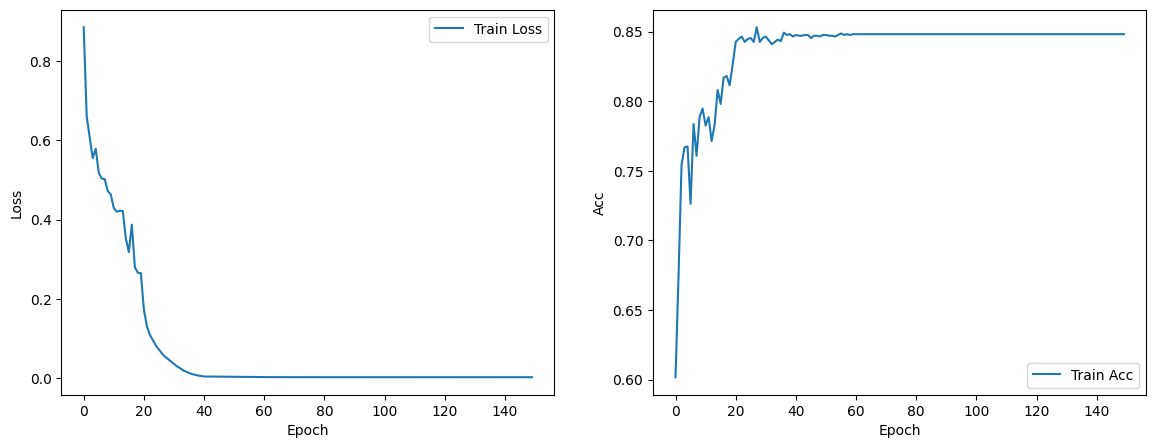

In [ ]:
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
plt.plot(Epoch_losses, label = 'Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Acc, label = 'Train Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
# 测试
model.eval()
test_pred, test_label = [], []
with torch.no_grad():
    for it, (batchg, label) in enumerate(test_loader):
        batchg, label = batchg.to(DEVICE), label.to(DEVICE)
        pred = torch.softmax(model(batchg), 1)
        pred = torch.max(pred, 1)[1].view(-1)
        test_pred += pred.detach().cpu().numpy().tolist()
        test_label += label.cpu().numpy().tolist()
Test_Acc = accuracy_score(test_label, test_pred)
print("Test accuracy: ", Test_Acc)

Test accuracy:  0.8481646273637374


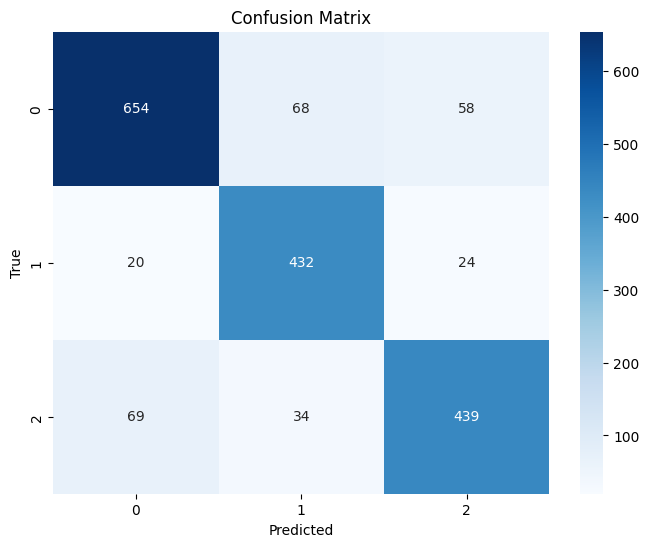

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       780
           1       0.81      0.91      0.86       476
           2       0.84      0.81      0.83       542

    accuracy                           0.85      1798
   macro avg       0.84      0.85      0.85      1798
weighted avg       0.85      0.85      0.85      1798



In [ ]:
# 生成混淆矩阵
cm = confusion_matrix(test_label, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 生成分类报告
report = classification_report(test_label, test_pred)
print(report)